In [ ]:
# Import some necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras import optimizers
from keras import Sequential, Model
from keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
cards = pd.read_csv('creditcard.csv')
cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Create our features and target variables
features = cards.drop(['Class'], axis = 1)
target = cards['Class']

In [ ]:
# Split the features and target for testing and training
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
x_train.shape, y_train.shape

((227845, 30), (227845,))

In [ ]:
# We only want to train the model on normal data
# Create a training data variable without any fraud cases
train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]
x_train = train_data
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
78250,57443.0,1.208449,0.274216,0.223712,1.265603,0.176575,0.117571,0.114933,-0.035736,0.187591,...,-0.124732,-0.126522,-0.070161,-0.131485,-0.393300,0.761800,-0.283881,0.046075,0.012086,4.20
87729,61813.0,-0.947065,0.256729,1.277980,-2.361950,0.547449,-1.975554,0.859278,-0.255472,0.300009,...,0.022299,-0.293630,-1.040837,-0.116638,0.362988,0.410880,-0.354978,-0.027178,0.060056,2.42
125214,77571.0,-1.738495,1.670239,1.209010,0.212099,-0.852664,0.850489,-1.519355,-2.394847,-0.242224,...,-0.814985,3.150960,-0.968546,0.465131,-0.050002,-0.260828,0.327115,-0.093363,-0.049812,5.99
55323,46881.0,-0.978570,1.149446,1.049942,1.135873,0.481873,0.238712,0.485309,0.071210,0.095554,...,0.188913,-0.083887,0.145996,-0.227441,-0.413802,0.002690,-0.211944,0.259584,0.320281,10.41
35467,38131.0,-1.038206,1.109501,0.577137,-0.044513,0.212277,-0.488372,0.726567,0.295047,-0.478350,...,-0.316313,0.120099,0.105003,-0.312484,-0.471569,0.196091,-0.463314,-0.111550,0.001321,55.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37161,38831.0,-1.193746,0.125442,2.097362,-0.637829,-0.286790,-0.131810,-0.097159,0.010550,-1.061824,...,-0.635908,-0.185417,-0.084365,0.137403,0.032192,-0.339562,-0.637492,-0.260552,0.310561,15.50
177204,123082.0,-8.803685,4.888270,-0.928340,-0.600919,-3.850934,0.762192,-2.139589,1.021200,5.532237,...,2.462200,-0.536320,-0.601971,-0.203996,-0.068695,1.833712,-0.164622,1.679923,1.025793,20.00
21291,31578.0,1.310017,-0.808537,0.846626,-0.800867,-1.339509,-0.214907,-1.122480,0.112987,-0.597890,...,0.142516,0.422495,1.075312,-0.172192,0.053122,0.423586,-0.048398,0.027192,0.015888,34.99
241113,150890.0,2.054374,-0.214325,-1.430639,0.181032,-0.003726,-0.832440,-0.033615,-0.109434,0.690101,...,-0.343026,0.263444,0.805376,-0.037551,-0.420180,0.211865,-0.090732,-0.032791,-0.075789,1.00


In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0, 1))
x_train_scaled = mm.fit_transform(train_data)
x_test_scaled = mm.fit_transform(x_test)

In [ ]:
# Create the model
from keras import regularizers
import keras
input = keras.Input(shape = (30, ))
encoded = layers.Dense(16, activation = 'relu')(input)
encoded = layers.Dense(8, activation = 'relu')(encoded)
encoded = layers.Dense(4, activation = 'relu')(encoded)
encoded = layers.Dense(2, activation = 'relu')(encoded) # Bottleneck
decoded = layers.Dense(4, activation = 'relu')(encoded)
decoded = layers.Dense(8, activation = 'relu')(decoded)
decoded = layers.Dense(16, activation = 'relu')(decoded)
decoded = layers.Dense(30, activation = 'sigmoid')(decoded)
autoencoder = keras.Model(input, decoded)

In [ ]:
# Compile & fit the model on our data
autoencoder.compile(optimizer = keras.optimizers.Adam(), loss = 'mse')
history = autoencoder.fit(x_train_scaled, x_train_scaled, batch_size = 256, epochs = 30, validation_data = (x_train_scaled, x_train_scaled))

Epoch 1/30
889/889 [==============================] - 10s 6ms/step - loss: 0.0193 - val_loss: 0.0020
Epoch 2/30
889/889 [==============================] - 6s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 3/30
889/889 [==============================] - 6s 7ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4/30
889/889 [==============================] - 4s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/30
889/889 [==============================] - 5s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/30
889/889 [==============================] - 4s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/30
889/889 [==============================] - 4s 5ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/30
889/889 [==============================] - 6s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/30
889/889 [==============================] - 7s 7ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/30
889/889 [==============================] - 6s 6ms/step - loss: 0.0019 - val_loss: 0.001

In [ ]:
# Create an encoder and decoder based on the model
encoder = keras.Model(input, encoded)
decoder = keras.Model(encoded, decoded)

In [ ]:
# Encode and decode the test data to check our predictions
encoded_data = encoder.predict(x_test_scaled)
decoded_data = decoder.predict(encoded_data)
encoded_data.mean()

1781/1781 [==============================] - 2s 1ms/step


0.51848304

1781/1781 [==============================] - 2s 1ms/step


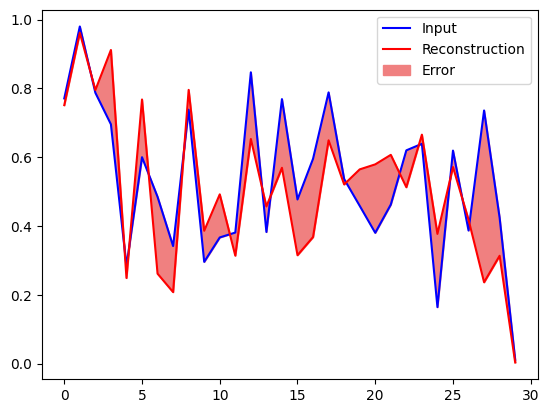

In [ ]:
# Plot the data to check accuracy
def plot(features, n):
  encoded_data = encoder.predict(features)
  decoded_data = decoder.predict(encoded_data)
  plt.plot(x_test_scaled[n], 'b')
  plt.plot(decoded_data[n], 'r')
  plt.fill_between(np.arange(30), features[n], decoded_data[n], color = 'lightcoral')
  plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
  plt.title('Deep Autoencoder')
  plt.show()
plot(x_test_scaled, 0)

In [ ]:
# TODO: Also make 1D CNN AE
#create and add noise to our train and test data
noise_factor = 0.8
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale =1.0,size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

mm = MinMaxScaler(feature_range = (0, 1))
x_train_noisy_scaled = mm.fit_transform(x_train_noisy)
x_test_noisy_scaled = mm.fit_transform(x_test_noisy)

In [ ]:
# create CNN model with AE
import keras
from keras import layers
input = keras.Input(shape=(30, 1))
x = layers.Conv1D(30, (3, ), activation='relu', padding = 'same')(input)
x = layers.MaxPool1D((2, ), padding = 'same')(x)
x = layers.Conv1D(30, (3, ), activation = 'relu', padding = 'same')(x)
encoder = layers.MaxPool1D((2, ), padding = 'same')(x)
x = layers.Conv1D(30, (3, ), activation = 'relu', padding = 'same')(encoder)
x = layers.UpSampling1D((2))(x)
x = layers.Conv1D(30,(3,), activation = 'relu', padding = 'same')(x)
x = layers.UpSampling1D((2))(x)

decoder = layers.Conv1D(1,(3,),activation='relu',padding='same')(x)
decoder = layers.Dense(1, activation = 'sigmoid')(decoder)
decoder = layers.Cropping1D(1)(decoder)
autoencoder = keras.Model(input,decoder)

In [ ]:
# Fit the CNN with AE
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
history = autoencoder.fit(x_train_noisy_scaled, x_train_noisy_scaled, epochs = 30, batch_size = 128, shuffle = True, validation_data = (x_test_noisy_scaled, x_test_noisy_scaled))

Epoch 1/30
1777/1777 [==============================] - 23s 8ms/step - loss: 0.6069 - val_loss: 0.6321
Epoch 2/30
1777/1777 [==============================] - 14s 8ms/step - loss: 0.5881 - val_loss: 0.6290
Epoch 3/30
1777/1777 [==============================] - 14s 8ms/step - loss: 0.5867 - val_loss: 0.6276
Epoch 4/30
1777/1777 [==============================] - 13s 8ms/step - loss: 0.5865 - val_loss: 0.6262
Epoch 5/30
1777/1777 [==============================] - 13s 8ms/step - loss: 0.5863 - val_loss: 0.6248
Epoch 6/30
1777/1777 [==============================] - 14s 8ms/step - loss: 0.5862 - val_loss: 0.6231
Epoch 7/30
1777/1777 [==============================] - 14s 8ms/step - loss: 0.5862 - val_loss: 0.6214
Epoch 8/30
1777/1777 [==============================] - 14s 8ms/step - loss: 0.5861 - val_loss: 0.6204
Epoch 9/30
1777/1777 [==============================] - 13s 8ms/step - loss: 0.5861 - val_loss: 0.6197
Epoch 10/30
1777/1777 [==============================] - 14s 8ms/step - l

In [ ]:
# Show a summary of the CNN with AE
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 30, 30)            120       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 30)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 30)            2730      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 30)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 30)             2730

In [ ]:
# Test the mean of predicting using the CNN with AE
encoded = keras.Model(input,encoder)
decoded = keras.Model(encoder,decoder)
encoded_data = encoded.predict(x_test_noisy_scaled)
decoded_data = decoded.predict(encoded_data)
decoded_data.mean()

1781/1781 [==============================] - 4s 2ms/step


0.54661167

1781/1781 [==============================] - 4s 2ms/step


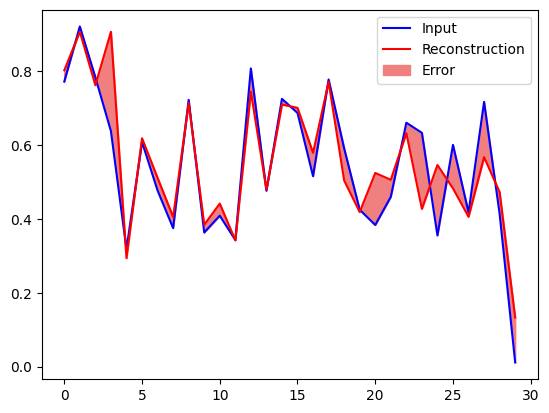

In [ ]:
# Plot the data to check accuracy
def plot(features, n):
  encoded_data = encoded.predict(features)
  decoded_data = decoded.predict(encoded_data)
  decoded_data = decoded_data.reshape([56962, 30])
  plt.plot(features[n], 'b')
  plt.plot(decoded_data[n], 'r')
  plt.fill_between(np.arange(30), features[n], decoded_data[n], color = 'lightcoral')
  plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
  plt.show()
  plt.title('CNN model with AE')
plot(x_test_noisy_scaled, 0)

As we can see, the error values for the CNN model with AE seem to be significantly lower when compared to the deep AE model. 